In [1]:
from tools import *

In [2]:
get_aligned_images("test/", "aligned_images/")

Wrote result aligned_images/original.png
Wrote result aligned_images/IMG_3619.png
Wrote result aligned_images/makeup2.png
Wrote result aligned_images/makeup1.png


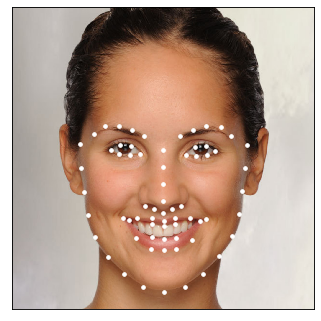

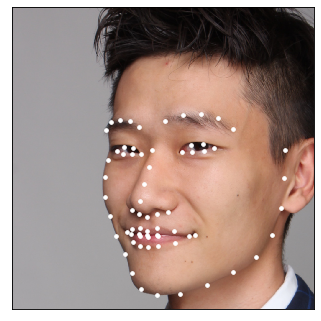

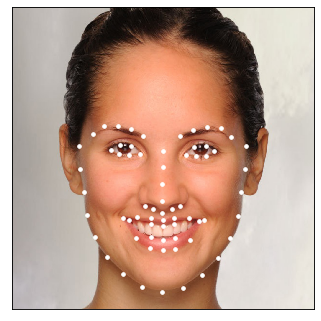

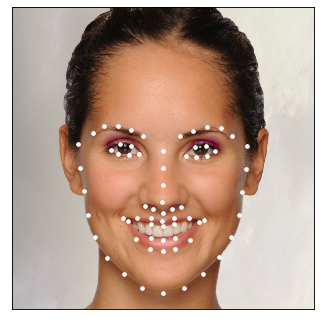

In [3]:
preds = get_draw_prediction_directory("aligned_images/")

In [4]:
!pip freeze > requirements.txt